# Récupération des données

## Pour un spectacle donné

In [46]:
import urllib.request
import re
import pandas as pd
import os
# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup
#spectacleId="37982"

#here id example with inside <p> <span class="n"> spectacleId="60720"
spectacleId="60720"
#spectacleId="36956"
#spectacleId="20185"
# specify which URL/web page we are going to be scraping
url = "https://www.lesarchivesduspectacle.net/?IDX_Spectacle=" + spectacleId
# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)
# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")
#the div where the information is
#the div where the information is
div_interested = soup.find('div', class_='fiche__footer') 
column_label=[]
column_value=[]
for row in div_interested.find_all('table')[0].findAll('tr'):
    th = row.findAll('th')[0].contents[0]
    td = row.findAll('td')[0].contents[0]
    column_label.append(th)
    column_value.append(td)
new_table = pd.DataFrame(columns=column_label, index= [0]) # I know the size
new_table["spectacleId"]=int(spectacleId)
for row in div_interested.find_all('table')[0].findAll('tr'):
    th = row.findAll('th')[0].contents[0]
    td = row.findAll('td')[0].contents[0].strip()
    new_table.at[0,th] = td
#Recuperer creation_date - organism_creation 
#the div where the information is
div_spectacle = soup.find('div', id='div_Spectacle')
p_spectacle = div_spectacle.find_all('p')[0]
if(p_spectacle) != None :
    for time in p_spectacle.findAll('time'):
        if time.has_attr('datetime'):
            new_table["typeDate"]=time.previousSibling
            new_table["date"]=time['datetime']
    for organism in p_spectacle.findAll('a',class_ ='c_Organisme'):
        if organism.has_attr('href'):
            new_table["organismeId"]=organism['href']
            new_table["organismeName"]=organism.contents[0].strip()
    if p_spectacle.find_all('span'):
        first = next(p_spectacle.stripped_strings)
        new_table["to_analyse"]=first
    else:
        new_table["to_analyse"]=p_spectacle.contents[0].string.strip()
    #print(p_spectacle.getText().strip())
    #if p_spectacle.contents[0].strip():
    #for string in p_spectacle.stripped_strings:
    #    print(string[0])
    #new_table["to_analyse"]=p_spectacle.contents[0].string.strip()
    #new_table["to_analyse"]=p_spectacle.stripped_strings[0]
    #print(p_spectacle.stripped_strings[0])
    
        # fetch and print first item
       # first = next(p_spectacle.stripped_strings)
       # print('first item:', first)
    
    #new_table["to_analyse"]=p_spectacle.contents[0].strip()
#new_table.dtypes
#table[0] class="f-spectacle__equipe"    table[1]  class="f-spectacle__equipe"  
#table_production = div_spectacle.find_all('table')[2]
#print(table_production)
new_table



,Genre,Durée,Pays,spectacleId,typeDate,date,organismeId,organismeName,to_analyse
0,Théâtre – Jeune public – à partir de 8 ans,1 heure,France,60720,Création le,2014-03-19,?IDX_Organisme=27836,Le Petit Écho de la Mode,Création le


## Fonction pour récupérer les informations liées à un spectacle


In [47]:
import urllib.request
import re
from bs4 import BeautifulSoup
import pandas as pd
import socket, errno
import sys

def import_df_type_spectacle(spectacleId):
    # specify which URL/web page we are going to be scraping
    url = "https://www.lesarchivesduspectacle.net/?IDX_Spectacle=" + str(spectacleId)    
    try:
        if spectacleId != 0:
            # open the url using urllib.request and put the HTML into the page variable
            page = urllib.request.urlopen(url)
            # parse the HTML from our URL into the BeautifulSoup parse tree format
            soup = BeautifulSoup(page, "lxml")
            div_interested = soup.find('div', class_='fiche__footer') 
            column_label=[]
            column_value=[]
            for row in div_interested.find_all('table')[0].findAll('tr'):
                th = row.findAll('th')[0].contents[0]
                td = row.findAll('td')[0].contents[0]
                column_label.append(th)
                column_value.append(td)
            new_table = pd.DataFrame(columns=column_label, index= [0]) # I know the size
            new_table["spectacleId"]=int(spectacleId)
            for row in div_interested.find_all('table')[0].findAll('tr'):
                th = row.findAll('th')[0].contents[0]
                td = row.findAll('td')[0].contents[0].strip()
                new_table.at[0,th] = td
            #Recuperer creation_date - organism_creation 
            #the div where the information is
            div_spectacle = soup.find('div', id='div_Spectacle')
            p_spectacle = div_spectacle.find_all('p')[0]
            if(p_spectacle) != None :
                for time in p_spectacle.findAll('time'):
                    if time.has_attr('datetime'):
                        new_table["typeDate"]=time.previousSibling
                        new_table["date"]=time['datetime']
                for organism in p_spectacle.findAll('a',class_ ='c_Organisme'):
                    if organism.has_attr('href'):
                        new_table["organismeId"]=organism['href']
                        new_table["organismeName"]=organism.contents[0].strip()
                if p_spectacle.find_all('span'):
                    first = next(p_spectacle.stripped_strings)
                    new_table["to_analyse"]=first
                else:
                    new_table["to_analyse"]=p_spectacle.contents[0].string.strip()
            return new_table
    except urllib.error.URLError as e:
        print(e.reason + "for spectacleId "  + str(spectacleId))
    except socket.timeout as e: # <-------- this block here
        print("We timed out")
    except Exception as e:
        print("Unexpected error for " + str(spectacleId) + " spectacle id "+ str(e))
        raise 





## Récupération des informations spectacles pour un organisme

In [48]:
import urllib.request
import re
from bs4 import BeautifulSoup
import pandas as pd
import time
from datetime import datetime
import pandas as pd
import os
import socket, errno
# 439 Arsenal
# 699 CCAM
# 383 grand theatre 
# 1914 CARREAU

organismId="1914"
print("start",datetime.now()) 
path=os.getcwd() + "/data/"
csv_file_path = path + "all_10_years_organism_" + organismId + ".csv"

df = pd.read_csv(csv_file_path)
t_array = df["performanceId"].to_numpy()

frames = [ import_df_type_spectacle(f) for f in t_array ]
result = pd.concat(frames)
result.set_index(['spectacleId'], drop=True, inplace=True)
result.to_csv(os.path.join(path,'all_10_years_organism_' + organismId + '_type_spectacle.csv'))
print("finish",datetime.now())



start 2020-08-01 15:51:04.409540
finish 2020-08-01 15:53:50.290892


# Filtre sur les spectacles de danse



## Répartition par genre

La base de données référencent les spectacles théâtre - danse - danse jeune public
A voir pour une évolution des spectacles jeune public

### Arsenal

In [65]:
import os
import pandas as pd
organismId="439"
csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + organismId + "_type_spectacle.csv"
df_spectacle_arsenal = pd.read_csv(csv_file_path)
#df_spectacle.groupby("Genre")["spectacleId"].count().sort_values(ascending=False)

Le jeune public

In [66]:
df_spectacle_arsenal

,spectacleId,Genre,Durée,Pays,typeDate,date,organismeId,organismeName,to_analyse
0,23453,Danse,1 heure,Belgique,Création le,2010-04-27,?IDX_Organisme=934&Saison=2009,Théâtre Royal de la Monnaie,Création le
1,30546,Théâtre – Musique,NaN,France,NaN,NaN,NaN,NaN,Création 2010
2,19502,Danse,1 heure 20,États-Unis,Création le,2009-09-25,NaN,NaN,Création le
3,12451,Danse – Jeune public – à partir de 6 ans,NaN,France,NaN,NaN,NaN,NaN,Création 2008
4,20185,Danse – à partir de 7 ans,1 heure,France,Création le,2009-11-03,?IDX_Organisme=837&Saison=2009,Maison de la Danse de Lyon,Création le
...,...,...,...,...,...,...,...,...,...
190,90791,Danse – Musique – à partir de 12 ans,1 heure,France,NaN,NaN,NaN,NaN,NaN
191,83385,Danse – Jeune public – jusqu'à 2 ans,25 minutes,France,NaN,NaN,NaN,NaN,Création 2017
192,84175,Danse – à partir de 7 ans,45 minutes,Suisse,Création le,2017-10-25,?IDX_Organisme=2254&Saison=2017,Le Petit Théâtre,Création le
193,88311,Danse – Musique – à partir de 10 ans,1 heure 35,Burkina Faso,Création le,2018-06-29,?IDX_Organisme=436&Annee=2018,La Friche La Belle de Mai,Création le


In [67]:
import re
#Filtre sur le genre - string contains danse
df_danse_arsenal=df_spectacle_arsenal[df_spectacle_arsenal['Genre'].astype(str).str.contains("Danse",flags=re.IGNORECASE, regex=True)]
len(df_danse_arsenal)

124

In [83]:
#Sur la danse - compte spectacle jeune public 
import re
df_danse_arsenal_jeune=df_danse_arsenal[df_danse_arsenal['Genre'].astype(str).str.contains("Jeune public|à partir",flags=re.IGNORECASE, regex=True)]
# 51 spectacles len(df_danse_arsenal_jeune)
part_jeune_arsenal=len(df_danse_arsenal_jeune)*100/len(df_danse_arsenal)
part_jeune_arsenal

41.12903225806452

### Grand théâtre

In [84]:
import time
import os
from datetime import datetime
import pandas as pd
organismId="383"


csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + organismId + "_type_spectacle.csv"
df_spectacle_lux = pd.read_csv(csv_file_path)
#Filtre sur le genre - string contains danse

df_danse_lux=df_spectacle_lux[df_spectacle_lux['Genre'].astype(str).str.contains("Danse")]
len(df_danse_lux)

207

In [85]:
#Sur la danse - compte spectacle jeune public 
import re
df_danse_lux_jeune=df_danse_lux[df_danse_lux['Genre'].astype(str).str.contains("Jeune public|à partir",flags=re.IGNORECASE, regex=True)]
part_jeune_lux=len(df_danse_lux_jeune)*100/len(df_danse_lux)
part_jeune_lux


18.357487922705314

### CCAM

In [86]:
import time
import os
from datetime import datetime
import pandas as pd
organismId="699"


csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + organismId + "_type_spectacle.csv"
df_spectacle_ccam = pd.read_csv(csv_file_path)
#Filtre sur le genre - string contains danse

df_danse_ccam=df_spectacle_ccam[df_spectacle_ccam['Genre'].astype(str).str.contains("Danse")]
df_danse_ccam

,spectacleId,Genre,Pays,typeDate,date,organismeId,organismeName,to_analyse,Durée
6,29201,Danse,France,NaN,NaN,NaN,NaN,Création 2010,NaN
9,29203,Danse,France,Création le,2011-02-02,?IDX_Organisme=699&Saison=2010,CCAM,Création le,NaN
15,27906,Danse,France,Création le,2010-10-01,?IDX_Organisme=1342&Annee=2010,Théâtre du Point du Jour,Création le,NaN
20,29208,Danse,France,NaN,NaN,NaN,NaN,Création 2010,NaN
41,37959,Danse – Jeune public – à partir de 5 ans,France,Création le,2012-01-12,?IDX_Organisme=953&Saison=2011,Théâtre Brétigny,Création le,50 minutes
...,...,...,...,...,...,...,...,...,...
283,2579,Danse,France,Création le,2007-06-24,?IDX_Organisme=339&Annee=2007,Chai du Terral,Création le,1 heure
284,59223,Danse,France,Création le,2012-03-27,?IDX_Organisme=9286&Annee=2012,Théâtre de Vanves,Création le,55 minutes
286,99502,Danse,France,NaN,NaN,NaN,NaN,NaN,50 minutes
290,90781,Danse – Musique,France,NaN,NaN,NaN,NaN,NaN,50 minutes


In [87]:
#Sur la danse - compte spectacle jeune public 
import re
df_danse_ccam_jeune=df_danse_ccam[df_danse_ccam['Genre'].astype(str).str.contains("Jeune public|à partir",flags=re.IGNORECASE, regex=True)]
part_jeune_ccam=len(df_danse_ccam_jeune)*100/len(df_danse_ccam)
part_jeune_ccam

36.0

### Carreau

In [88]:
import time
import os
from datetime import datetime
import pandas as pd
organismId="1914"


csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + organismId + "_type_spectacle.csv"
df_spectacle_carreau = pd.read_csv(csv_file_path)
#Filtre sur le genre - string contains danse

df_danse_carreau=df_spectacle_carreau[df_spectacle_carreau['Genre'].astype(str).str.contains("Danse")]
df_danse_carreau

,spectacleId,Genre,Pays,typeDate,date,organismeId,organismeName,to_analyse,Durée
3,27687,Danse – Musique – à partir de 6 ans,France,Création le,2010-09-25,?IDX_Organisme=1342&Annee=2010,Maison de la Danse de Lyon,Création le,1 heure 5
7,10120,Danse,Belgique,NaN,NaN,NaN,NaN,Création 2008,NaN
10,21054,Théâtre – Danse – Jeune public – à partir de 7...,France,Création le,2010-01-19,?IDX_Organisme=1022&Saison=2009,Théâtre des Cordes,Création le,55 minutes
12,27180,Théâtre – Danse,Belgique,Création le,2010-07-09,?IDX_Organisme=2776&Annee=2010,Salle de spectacle de Vedène,Création le,NaN
20,12382,Danse,France,Création le,2009-01-17,?IDX_Organisme=1593&Saison=2008,Théâtre de la Cité Internationale,Création le,NaN
...,...,...,...,...,...,...,...,...,...
218,94433,Danse,Belgique,Création le,2018-03-22,?IDX_Organisme=12755&Saison=2017,Les Brigittines,Création le,1 heure 15
219,89074,Danse,Belgique,Création le,2018-10-20,?IDX_Organisme=2113&Saison=2018,Koninklijke Vlaamse Schouwburg,Création le,1 heure 45
221,74272,Danse – Musique,France,NaN,NaN,NaN,NaN,Création 2015,50 minutes
223,80629,Danse – à partir de 10 ans,Belgique,Création le,2017-09-28,?IDX_Organisme=1643&Saison=2017,deSingel,Création le,1 heure 15


In [89]:
#Sur la danse - compte spectacle jeune public 
import re
df_danse_carreau_jeune=df_danse_carreau[df_danse_carreau['Genre'].astype(str).str.contains("Jeune public|à partir",flags=re.IGNORECASE, regex=True)]
part_jeune_carreau=len(df_danse_carreau_jeune)*100/len(df_danse_carreau)
part_jeune_carreau

53.125

### Résumé part de la programmation jeunesse danse dans la programmation

<Figure size 576x576 with 0 Axes>

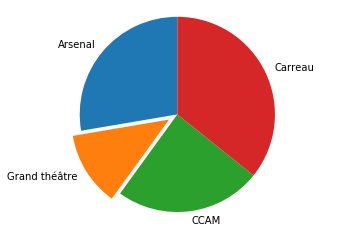

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 8))
sizes = [part_jeune_arsenal, part_jeune_lux, part_jeune_ccam, part_jeune_carreau]
labels = 'Arsenal', 'Grand théâtre', 'CCAM', 'Carreau'
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [80]:
sizes = [part_jeune_arsenal, part_jeune_lux, part_jeune_ccam, part_jeune_carreau]
sizes

[41.12903225806452, 18.357487922705314, 36.0, 53.125]

## Répartition par pays

### Arsenal

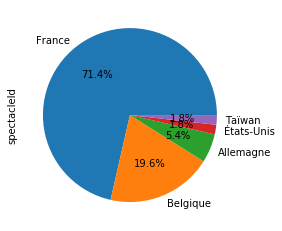

In [65]:
#df_danse.Pays.value_counts().head(5)
df_danse_arsenal.groupby("Pays")["spectacleId"].count().sort_values(ascending=False).head(5).plot.pie(autopct='%1.1f%%')

### Luxembourg

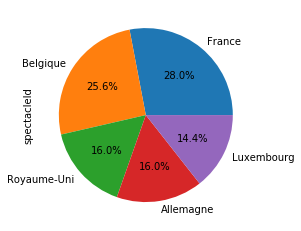

In [66]:
#df_danse.Pays.value_counts().head(5)
df_danse_lux.groupby("Pays")["spectacleId"].count().sort_values(ascending=False).head(5).plot.pie(autopct='%1.1f%%')

### CCAM

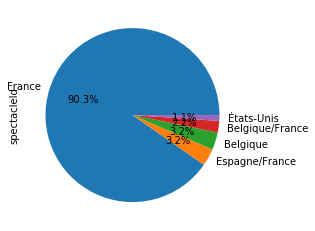

In [67]:
#df_danse.Pays.value_counts().head(5)
df_danse_ccam.groupby("Pays")["spectacleId"].count().sort_values(ascending=False).head(5).plot.pie(autopct='%1.1f%%')

### Carreau

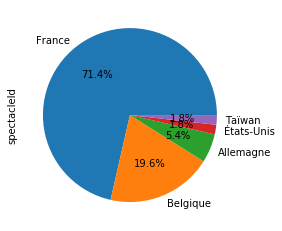

In [68]:
#df_danse.Pays.value_counts().head(5)
df_danse_carreau.groupby("Pays")["spectacleId"].count().sort_values(ascending=False).head(5).plot.pie(autopct='%1.1f%%')

## Part de création faite

regarder dans la colonne organismeId

### Arsenal

In [93]:
import re
#Filtre sur le genre - string contains danse
df_danse_cree_arsenal=df_danse_arsenal[df_danse_arsenal['organismeId'].astype(str).str.contains("439",flags=re.IGNORECASE, regex=True)]
df_danse_cree_arsenal

,spectacleId,Genre,Durée,Pays,typeDate,date,organismeId,organismeName,to_analyse
21,38625,Danse,NaN,France,Création le,2011-12-08,?IDX_Organisme=439&Saison=2011,L'Arsenal de Metz,Création le
41,45035,Danse – à partir de 14 ans,1 heure 15,France,Création le,2013-01-11,?IDX_Organisme=439&Saison=2012,L'Arsenal de Metz,Création le
70,59853,Danse – Jeune public – à partir de 12 ans,1 heure,France,Création le,2015-01-15,?IDX_Organisme=439&Saison=2014,L'Arsenal de Metz,Création le
139,90517,Danse,1 heure,France,Création le,2018-10-11,?IDX_Organisme=439&Saison=2018,L'Arsenal de Metz,Création le


### Luxembourg

In [95]:
import re
#Filtre sur le genre - string contains danse
df_danse_cree_lux=df_danse_lux[df_danse_lux['organismeId'].astype(str).str.contains("383",flags=re.IGNORECASE, regex=True)]
len(df_danse_cree_lux)

17

### CCAM

In [96]:
import re
#Filtre sur le genre - string contains danse
df_danse_cree_ccam=df_danse_ccam[df_danse_ccam['organismeId'].astype(str).str.contains("699",flags=re.IGNORECASE, regex=True)]
len(df_danse_cree_ccam)

6

### Carreau

In [97]:
import re
#Filtre sur le genre - string contains danse
df_danse_cree_carreau=df_danse_carreau[df_danse_carreau['organismeId'].astype(str).str.contains("1914",flags=re.IGNORECASE, regex=True)]
len(df_danse_cree_carreau)

0

### Organismes qui font le plus de création

Attention nous sommes sur les spectacles diffusés par Arsenal / Grand théâtre / CCAM / Carreau

# Décalage entre création et diffusion

voir si conforme à l'étude onda 

- garder spectacleId / typeDate / date / to_analyse
- si typeDate et date vide - alors to_analyse


## Date de création

In [216]:
import os
import pandas as pd

organismId="383"
csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + organismId + "_type_spectacle.csv"
df_spectacle_arsenal = pd.read_csv(csv_file_path)
#Filtre sur le genre - string contains danse
df_danse_arsenal=df_spectacle_arsenal[df_spectacle_arsenal['Genre'].astype(str).str.contains("Danse",flags=re.IGNORECASE, regex=True)]
df_danse_arsenal= df_danse_arsenal[['spectacleId', 'typeDate', 'date','to_analyse']]
#on enlève les performances sans date
df_danse_arsenal.dropna(subset=['typeDate','date','to_analyse'], how='all', inplace=True)
#on transforme le champ date en datetime
df_danse_arsenal['date']= pd.to_datetime(df_danse_arsenal['date'], format='%Y-%m-%d', errors='coerce')
# on garde que l'année 
df_danse_arsenal['date']=df_danse_arsenal.date.dt.year
# on ne garde que l'année dans la colonne to_analyse
df_danse_arsenal['to_analyse']=df_danse_arsenal['to_analyse'].replace("Création le","")
df_danse_arsenal['to_analyse'] = df_danse_arsenal['to_analyse'].str[-4:]
df_danse_arsenal.loc[df_danse_arsenal['to_analyse'] !='','year_creation'] = df_danse_arsenal['to_analyse'] 

df_danse_arsenal.loc[pd.isna(df_danse_arsenal['year_creation']),'year_creation'] = df_danse_arsenal['date'] 
df_danse_arsenal= df_danse_arsenal[['spectacleId', 'year_creation']]
df_danse_arsenal = df_danse_arsenal.astype(int)
df_danse_arsenal
#path=os.getcwd() + "/data/"
#df_danse_arsenal.to_csv(os.path.join(path,'all_creation_luxembourg.csv'))

#créer une nouvelle colonne date_year si date NaN alors on prend to_analyse
#fn = lambda row: row.a + row.b # define a function for the new column
#col = df_danse_arsenal.apply(fn, axis=1) # get column data with an index
#df_danse_arsenal = df_danse_arsenal.assign(c=col.values) # assign values to column 'c'df['C'] = df['C'].apply(np.int64)

## Date de diffusion

In [200]:
import os
import pandas as pd

organismId="439"
csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + organismId + ".csv"
df_arsenal_diffusion = pd.read_csv(csv_file_path)
#on enlève les lignes où les performanceId sont nulles
#df_arsenal_diffusion.dropna(subset=['performanceId'], how='all', inplace=True)
df_arsenal_diffusion = df_arsenal_diffusion[~(df_arsenal_diffusion['performanceId']==0)]
df_arsenal_diffusion= df_arsenal_diffusion[['performanceId', 'year','performance','author']]
df_arsenal_diffusion.rename(columns = {'performanceId':'spectacleId'}, inplace = True)
df_arsenal_diffusion.rename(columns = {'year':'year_diffusion'}, inplace = True)
df_arsenal_diffusion

,spectacleId,year_diffusion,performance,author
0,23453,2010,Babel (Words),Sidi Larbi Cherkaoui
1,30546,2010,Pour l'amour de Cosette,Victor Hugo
2,19502,2010,Nearly 90²,Merce Cunningham
3,12451,2010,LOL,Bintou Dembélé
4,20185,2010,Asphalte,Pierre Rigal
...,...,...,...,...
218,90791,2019,L'Amour sorcier,Aïcha M'Barek
219,83385,2019,"Iceberg, musique de l'eau",Michèle Meftah
220,84175,2019,Hocus Pocus,Philippe Saire
221,88311,2019,Kirina,Serge Aimé Coulibaly


spectacleId
68361    1
30910    1
26064    1
Name: spectacleId, dtype: int64

In [202]:
#spectacleId
#43869     4
#59854     4
#87796     4

## Comparaison date de création et date de diffusion

In [210]:
#join df_arsenal_diffusion et df_danse_arsenal
df_creation_diffusion = df_danse_arsenal.join(df_arsenal_diffusion.set_index('spectacleId'), on='spectacleId')
#path=os.getcwd() + "/data/"
#df_creation_diffusion.to_csv(os.path.join(path,'all_creation_diffusion.csv'))
df_creation_diffusion

,spectacleId,year_creation,year_diffusion,performance,author
0,23453,2010,2010,Babel (Words),Sidi Larbi Cherkaoui
2,19502,2009,2010,Nearly 90²,Merce Cunningham
3,12451,2008,2010,LOL,Bintou Dembélé
4,20185,2009,2010,Asphalte,Pierre Rigal
6,30548,2010,2010,Cribles/Live,Emmanuelle Huynh
...,...,...,...,...,...
187,88893,2019,2019,Anthologie du cauchemar,Marcia Barcellos
188,82877,2017,2019,Z'Anima,Mié Coquempot
191,83385,2017,2019,"Iceberg, musique de l'eau",Michèle Meftah
192,84175,2017,2019,Hocus Pocus,Philippe Saire


In [204]:
df_creation_diffusion.groupby("spectacleId")["spectacleId"].count().sort_values(ascending=False).head(5)

spectacleId
43869     4
59854     4
87796     4
100034    1
50262     1
Name: spectacleId, dtype: int64

In [212]:
#créer une nouvelle colonne (date de diffusion - date de création)
fn = lambda row: row.year_diffusion - row.year_creation # define a function for the new column
col = df_creation_diffusion.apply(fn, axis=1) # get column data with an index
df_creation_diffusion = df_creation_diffusion.assign(gap_crea_diffu=col.values) # assign values to column 'c'df['C'] = df['C'].apply(np.int64)
df_creation_diffusion = df_creation_diffusion[df_creation_diffusion['gap_crea_diffu'] > 5]
df_creation_diffusion

,spectacleId,year_creation,year_diffusion,performance,author,gap_crea_diffu
19,26064,1987,2011,Mikrokosmos,Anne Teresa De Keersmaeker,24
137,68361,2003,2018,Counter Phrases,Anne Teresa De Keersmaeker,15
155,30910,2010,2018,Play,Shantala Shivalingappa,8
